In [2]:
import sys
sys.path.append('../')

In [3]:
%load_ext autoreload

In [11]:
%autoreload

import os
import sweetviz as sv
import pandas as pd
import matplotlib.pyplot as plt

home_dir = os.path.join(os.path.expanduser('~'), 'Documents/TDT4173-ML')
load_data_path = os.path.join(home_dir, 'data_processed')
save_data_path = os.path.join(home_dir, 'data_feature_engineering')

In [5]:
train = pd.read_csv(os.path.join(load_data_path, 'imputed_2n_mean_train.csv'))
train.set_index('date_forecast', inplace=True)

In [6]:
report = sv.analyze(source=train, target_feat='pv_measurement')

                                             |          | [  0%]   00:00 -> (? left)

In [7]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [15]:
correlation_matrix = train.corr()
print(correlation_matrix['pv_measurement'].sort_values(ascending=False))

pv_measurement                    1.000000
direct_rad:W                      0.623036
direct_rad_1h:J                   0.613723
clear_sky_rad:W                   0.602105
clear_sky_energy_1h:J             0.593617
diffuse_rad:W                     0.524993
diffuse_rad_1h:J                  0.520342
sun_elevation:d                   0.498573
is_day:idx                        0.393877
t_1000hPa:K                       0.282759
dew_point_2m:K                    0.215519
absolute_humidity_2m:gm3          0.213243
visibility:m                      0.150575
pressure_100m:hPa                 0.146090
pressure_50m:hPa                  0.142290
sfc_pressure:hPa                  0.138484
msl_pressure:hPa                  0.128881
cloud_base_agl:m                  0.113054
ceiling_height_agl:m              0.111323
wind_speed_w_1000hPa:ms           0.002389
snow_drift:idx                   -0.001928
sun_azimuth:d                    -0.009850
dew_or_rime:idx                  -0.009978
snow_melt_1

In [13]:

correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_30946/199606204.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)


,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,ceiling_height_agl:m,cloud_base_agl:m,pv_measurement
absolute_humidity_2m:gm3,1.00,-0.80,0.36,0.36,0.19,0.97,0.28,0.29,0.24,0.25,0.05,-0.07,-0.13,-0.09,-0.16,-0.10,-0.11,0.30,-0.32,0.13,0.08,-0.04,0.15,0.14,-0.12,0.28,0.18,0.13,-0.19,-0.00,-0.03,0.05,0.02,0.42,0.15,0.90,0.07,-0.20,-0.12,0.10,-0.25,0.01,0.07,0.01,0.21
air_density_2m:kgm3,-0.80,1.00,-0.45,-0.44,-0.15,-0.83,-0.38,-0.39,-0.36,-0.38,-0.11,0.02,0.07,0.05,0.08,0.06,0.06,-0.36,0.38,0.32,-0.11,-0.02,0.30,0.31,0.15,-0.18,0.10,0.32,0.24,0.00,0.00,-0.09,-0.07,-0.46,-0.10,-0.90,-0.14,0.04,-0.07,-0.01,0.12,0.03,-0.12,-0.09,-0.28
clear_sky_energy_1h:J,0.36,-0.45,1.00,0.99,-0.02,0.36,0.91,0.92,0.74,0.75,-0.01,-0.04,-0.07,-0.05,-0.08,-0.06,-0.06,0.67,-0.72,0.15,-0.01,-0.04,0.16,0.15,-0.09,0.05,-0.33,0.15,-0.08,-0.00,-0.02,-0.04,0.06,0.83,0.02,0.44,-0.01,0.05,0.01,0.07,-0.35,0.02,0.08,0.06,0.59
clear_sky_rad:W,0.36,-0.44,0.99,1.00,-0.02,0.36,0.92,0.91,0.74,0.74,-0.01,-0.04,-0.07,-0.05,-0.08,-0.06,-0.06,0.67,-0.72,0.15,-0.01,-0.04,0.16,0.15,-0.09,0.05,-0.31,0.15,-0.08,-0.00,-0.02,-0.04,0.00,0.83,0.02,0.43,-0.01,0.04,-0.00,0.06,-0.33,0.02,0.07,0.06,0.60
dew_or_rime:idx,0.19,-0.15,-0.02,-0.02,1.00,0.20,-0.02,-0.02,-0.01,-0.01,0.06,-0.06,-0.04,-0.03,-0.04,-0.03,-0.04,-0.02,0.02,0.02,0.01,0.00,0.03,0.03,-0.47,0.03,0.07,0.02,-0.05,-0.00,0.00,0.03,-0.02,0.01,0.03,0.17,0.06,-0.08,-0.04,0.00,-0.02,0.00,0.01,-0.01,-0.01
dew_point_2m:K,0.97,-0.83,0.36,0.36,0.20,1.00,0.29,0.30,0.24,0.25,0.09,-0.07,-0.13,-0.09,-0.16,-0.10,-0.11,0.30,-0.32,0.12,0.08,-0.03,0.14,0.13,-0.13,0.25,0.18,0.12,-0.25,-0.00,-0.02,0.07,0.02,0.42,0.19,0.91,0.11,-0.24,-0.07,0.14,-0.23,0.01,0.06,0.00,0.22
diffuse_rad:W,0.28,-0.38,0.91,0.92,-0.02,0.29,1.00,0.99,0.57,0.58,0.06,-0.04,-0.05,-0.05,-0.06,-0.06,-0.06,0.69,-0.74,0.12,-0.02,-0.04,0.13,0.13,-0.09,-0.02,-0.30,0.12,-0.07,-0.00,-0.01,-0.08,0.00,0.80,-0.06,0.35,0.07,0.07,-0.00,0.06,-0.30,0.02,0.08,0.04,0.52
diffuse_rad_1h:J,0.29,-0.39,0.92,0.91,-0.02,0.30,0.99,1.00,0.57,0.58,0.05,-0.04,-0.06,-0.05,-0.07,-0.06,-0.06,0.69,-0.74,0.13,-0.02,-0.04,0.13,0.13,-0.09,-0.02,-0.32,0.12,-0.07,-0.00,-0.01,-0.08,0.06,0.80,-0.05,0.36,0.07,0.07,0.01,0.07,-0.32,0.02,0.08,0.05,0.52
direct_rad:W,0.24,-0.36,0.74,0.74,-0.01,0.24,0.57,0.57,1.00,0.99,-0.33,-0.02,-0.05,-0.04,-0.06,-0.05,-0.05,0.47,-0.52,0.18,-0.06,-0.09,0.19,0.18,-0.06,-0.10,-0.45,0.18,-0.06,-0.00,-0.01,-0.15,-0.00,0.61,-0.18,0.38,-0.29,0.27,-0.10,-0.09,-0.28,0.00,0.19,0.22,0.62
direct_rad_1h:J,0.25,-0.38,0.75,0.74,-0.01,0.25,0.58,0.58,0.99,1.00,-0.32,-0.02,-0.06,-0.04,-0.07,-0.05,-0.05,0.48,-0.52,0.18,-0.05,-0.08,0.19,0.18,-0.06,-0.10,-0.48,0.18,-0.06,-0.00,-0.01,-0.15,0.04,0.61,-0.18,0.40,-0.28,0.28,-0.09,-0.09,-0.29,0.00,0.20,0.23,0.61


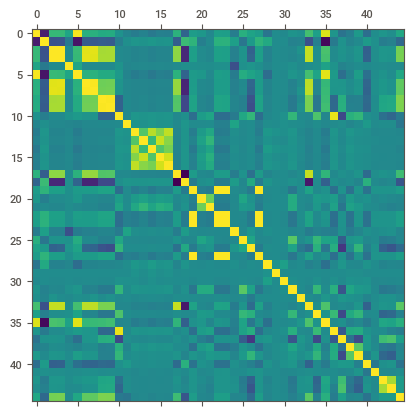

In [12]:
plt.matshow(correlation_matrix)
plt.show()

<AxesSubplot:>

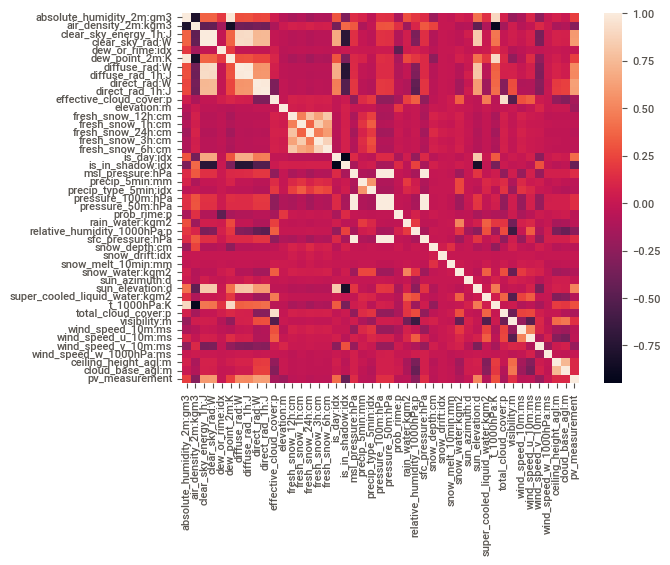

In [14]:
import seaborn as sns
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)